## Ejercicio web Scraping

El ejercio personal propuesto, trata de obtener la informacion del siguiente cuadro en wikipedia.
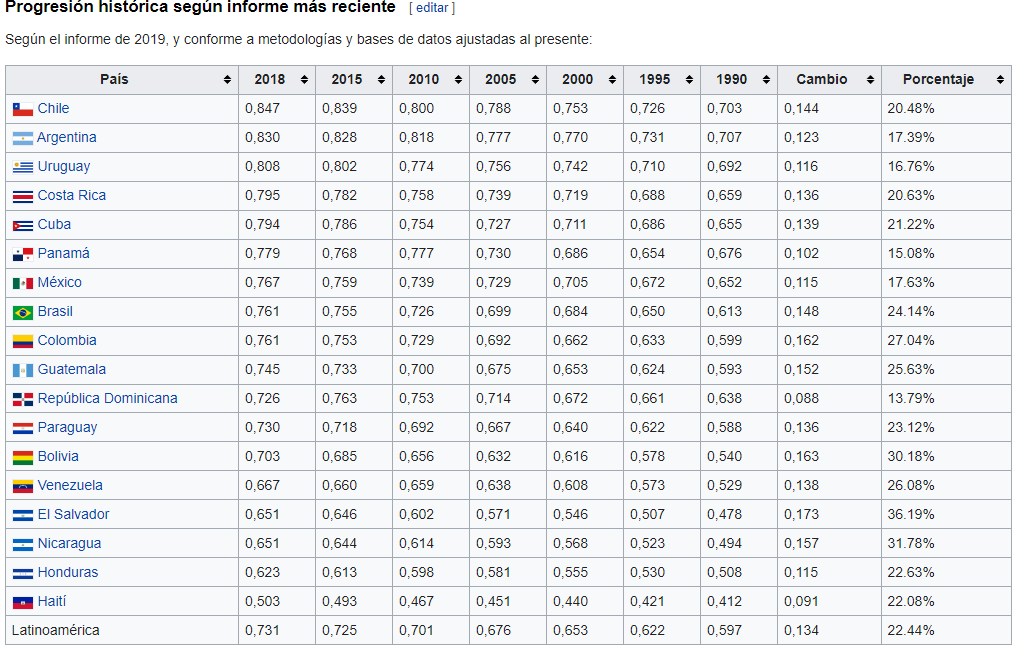

La idea propuesta sera: 
  
  * Analizar como esta compuesto el html.
  * Obtener el nombre de las columnas.
  * Iterar fila por fila, obteniendo los datos de c/u.

Para parsear bien el html definiremos una funcion que eliminara etiqueta por etiqueta, obteniendo el contenido de c/u. Esto bien se podria hacer mas rapido pasandole la lista de etiquetas asi removerlas todas juntas.

In [6]:
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
html = requests.get("https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_de_Am%C3%A9rica_Latina_por_%C3%ADndice_de_desarrollo_humano")
soup = BeautifulSoup(html.content, "html.parser")
print(soup.prettify())

In [ ]:
table = soup.find("table", class_ = "wikitable sortable")

table

In [7]:
def limpiarhtml(html):
  expresion = re.compile('<.*?>')
  texto = re.sub(expresion, '', html)
  return texto

In [49]:
# primero obtenemos el nombre de las columnas
columns_names = []
for column in table.find_all("th"):
  columns_names.append(limpiarhtml(str(column)))

print(f"antes {columns_names}")

#ahora vamos a limpiar el resultado
for i in range(len(columns_names)):
    columns_names[i] = columns_names[i].replace('\n', '')

print(f"despues {columns_names}")

antes ['País\n', '2018\n', '2015\n', '2010\n', '2005\n', '2000\n', '1995\n', '1990\n', 'Cambio\n', 'Porcentaje\n']
despues ['País', '2018', '2015', '2010', '2005', '2000', '1995', '1990', 'Cambio', 'Porcentaje']


In [77]:
# ahora tenemos que extraer la informacion de cada fila
data = []
for row in table.find_all("tr", class_ = ""):
  data.append(limpiarhtml(str(row.find_all("td", class_ = ""))))

# limpiamos nuevamente
for i in range(len(data)):
    data[i] = data[i].replace('\n', '')

data

['[]',
 '[ Chile, 0,847, 0,839, 0,800, 0,788, 0,753, 0,726, 0,703, 0,144, 20.48%]',
 '[ Argentina, 0,830, 0,828, 0,818, 0,777, 0,770, 0,731, 0,707, 0,123, 17.39%]',
 '[ Uruguay, 0,808, 0,802, 0,774, 0,756, 0,742, 0,710, 0,692, 0,116, 16.76%]',
 '[ Costa Rica, 0,795, 0,782, 0,758, 0,739, 0,719, 0,688, 0,659, 0,136, 20.63%]',
 '[ Cuba, 0,794, 0,786, 0,754, 0,727, 0,711, 0,686, 0,655, 0,139, 21.22%]',
 '[ Panamá, 0,779, 0,768, 0,777, 0,730, 0,686, 0,654, 0,676, 0,102, 15.08%]',
 '[ México, 0,767, 0,759, 0,739, 0,729, 0,705, 0,672, 0,652, 0,115, 17.63%]',
 '[ Brasil, 0,761, 0,755, 0,726, 0,699, 0,684, 0,650, 0,613, 0,148, 24.14%]',
 '[ Colombia, 0,761, 0,753, 0,729, 0,692, 0,662, 0,633, 0,599, 0,162, 27.04%]',
 '[ Guatemala, 0,745, 0,733, 0,700, 0,675, 0,653, 0,624, 0,593, 0,152, 25.63%]',
 '[ República Dominicana, 0,726, 0,763, 0,753, 0,714, 0,672, 0,661, 0,638, 0,088, 13.79%]',
 '[ Paraguay, 0,730, 0,718, 0,692, 0,667, 0,640, 0,622, 0,588, 0,136, 23.12%]',
 '[ Bolivia, 0,703, 0,685, 0,65

Una vez obtenidos los datos ya resulta facil convertilos en tablas para un analisis mas exhaustivo